In [25]:
!pip install pandas numpy matplotlib seaborn scikit-learn factor_analyzer


3838.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


(297, 14)


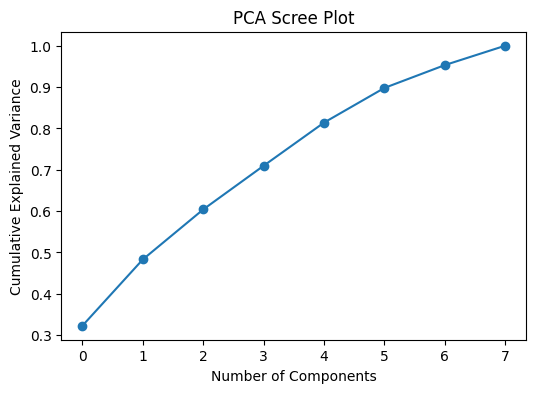

Explained variance ratio:
[0.32292801 0.16020546 0.12089    0.10564827 0.10433729 0.08385082
 0.05524151 0.04689866]
Loadings:
               PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.366280  0.458391 -0.217600 -0.287930 -0.294777  0.109331   
trestbps  0.228092  0.365302  0.657174 -0.506270  0.111993 -0.018245   
chol      0.102552  0.570781  0.191883  0.762772 -0.077200  0.157674   
thalach  -0.420759  0.109991  0.360291  0.097294  0.386619 -0.410534   
oldpeak   0.460027 -0.265007  0.228208  0.179783 -0.003843 -0.401881   
ca        0.347930  0.245833 -0.476523  0.007081  0.409856 -0.546910   
slope     0.411737 -0.390322  0.272233  0.179697 -0.317798 -0.118433   
thal      0.352208 -0.188494  0.029672  0.069548  0.690027  0.565393   

               PC7       PC8  
age       0.643436  0.112280  
trestbps -0.323753 -0.093009  
chol     -0.118386 -0.014662  
thalach   0.588397 -0.085818  
oldpeak   0.031284  0.686472  
ca       -0.199794 -0.290476  
slope  

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("data/cleveland.csv", header=None)
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric)
df = df.dropna()
print(df.shape)

continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'slope', 'thal']
X = df[continuous_vars]



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.show()

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(continuous_vars))],
    index=continuous_vars
)


scores = pd.DataFrame(pca.transform(X_scaled), columns=[f"PC{i+1}" for i in range(len(continuous_vars))])
scores.head()

print("Loadings:")
print(loadings)

Factor analysis

In [35]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer


kmo_all, kmo_model = calculate_kmo(X_scaled)
bartlett, p_value = calculate_bartlett_sphericity(X_scaled)

print("KMO:", kmo_model)
print("Bartlett p-value:", p_value)


fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
fa.fit(X_scaled)

fa_loadings = pd.DataFrame(
    fa.loadings_,
    index=continuous_vars,
    columns=['Factor1', 'Factor2']
)
print("Fa-Loadings:")
print(fa_loadings)

communalities = pd.DataFrame(fa.get_communalities(), index=continuous_vars, columns=['Communality'])
print("\nCommunalities:")
print(communalities)

factor_scores = pd.DataFrame(fa.transform(X_scaled), columns=['F1', 'F2'])
print("\nFactor Scores (first 5 rows):")
print(factor_scores.head())


KMO: 0.6805977169784876
Bartlett p-value: 2.9719518205055185e-68
Fa-Loadings:
           Factor1   Factor2
age       0.118642  0.990416
trestbps  0.161105  0.273755
chol     -0.004957  0.205256
thalach  -0.444974 -0.344887
oldpeak   0.795223  0.103824
ca        0.277507  0.332570
slope     0.705027  0.076342
thal      0.437085  0.075849

Communalities:
          Communality
age          0.995000
trestbps     0.100897
chol         0.042155
thalach      0.316949
oldpeak      0.643159
ca           0.187613
slope        0.502891
thal         0.196797

Factor Scores (first 5 rows):
         F1        F2
0  1.221708  0.791103
1  0.573672  1.325043
2  1.051714  1.259516
3  1.703262 -2.156169
4 -0.254353 -1.476623


/Users/kleisallaku/Desktop/Folders/master/Technicum_Wien/SEMESTER_3/AAM/Project/venv/lib/python3.14/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kleisallaku/Desktop/Folders/master/Technicum_Wien/SEMESTER_3/AAM/Project/venv/lib/python3.14/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
